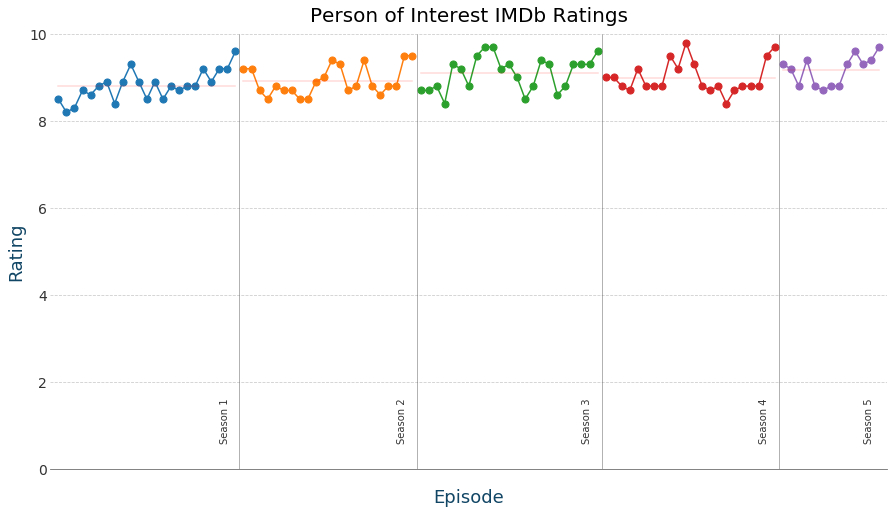

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

df_imdb = pd.read_csv('PoIRating.csv', delimiter=',', header=0)
df_imdb.columns = df_imdb.columns.str.strip()

rate_per_season_imdb = [df_imdb[df_imdb.season == i].rate.values for i in range(1,6)]

fig, ax = plt.subplots(figsize=(15,8))

y = df_imdb.rate.values
x = np.arange(0, len(df_imdb.ep.values))

ep_per_seasons = list()
for n_ep in df_imdb.groupby(df_imdb.season).ep.count():
    if len(ep_per_seasons) > 0:
        ep_per_seasons.append(n_ep + ep_per_seasons[-1])
    else:
        ep_per_seasons.append(n_ep)

for i, rates in enumerate(rate_per_season_imdb):
    x_values = range(ep_per_seasons[i-1] if i > 0 else 0, ep_per_seasons[i])
    patch = ax.scatter(x_values, rates, s=50, zorder=2)
    ax.plot(x_values, rates)
    ax.plot(x_values, [np.mean(rates) for _ in range(len(rates))], '-', color='red', alpha=.15, label='mean()')

for x_eps in ep_per_seasons[:-1]:
    ax.vlines(x_eps-.5, 0, 10, color='#666666', linewidth=.5, zorder=3)

for i, x_eps in enumerate(ep_per_seasons):
    ax.text(x_eps-2.95, 1.45, 'Season {}'.format(i+1), color='#333333', rotation=90)
    
ax.yaxis.grid(color='#cccccc', linestyle='--', zorder=1)

ax.set_title('Person of Interest IMDb Ratings', **{'fontsize': 20}, pad=12)
ax.set_xlabel('Episode', color='#114665', **{'fontsize': 18}, labelpad=20)
ax.set_ylabel('Rating', color='#114665', **{'fontsize': 18})

ax.set_yticklabels(map(str, range(0, 11, 2)), **{'fontsize': 14}, color='#333333')

ax.set_xlim([-1, len(x)])
ax.set_ylim([0, 10])

ax.tick_params(which='both', direction='in', bottom=False, labelbottom=False, left=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#666666')

plt.savefig('imdbpoi.png', bbox_inches='tight')

In [60]:
ax.set_xticklabels(map(str, range(0, 103, 10)), **{'fontsize': 14}, color='#333333')

[]